In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
data = np.load('/content/imagedata.npy')
data[0].shape, data.shape

((100, 100), (300, 100, 100))

In [30]:
data[0][0]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

In [40]:
data[1][0]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   2,   1,   2,   4,   2,   2,
         1,   1,   1,   2,   4,   2,   2,   4,  93, 136, 200, 139,   3,
         3,   2,   3,   2,   2,   1,   2,   2,   2,   2,   2,   2,   5,
         1,   3,   1,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,
         2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

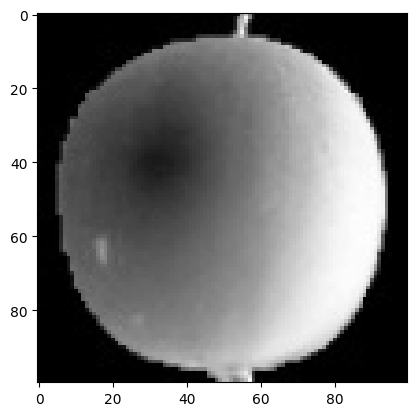

In [31]:
plt.imshow(data[0],cmap='gray')

([], [])

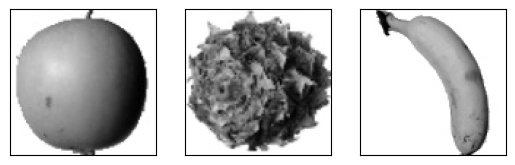

In [32]:
plt.subplot(1,3,1)
plt.imshow(data[10],cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(data[110],cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(data[220],cmap='gray_r')
plt.xticks([])
plt.yticks([])

In [34]:
# 100개씩 순서대로 있음... 3개의 부류로 나눔
apple = data[:100].reshape(-1,100*100)
pineapple =  data[100:200].reshape(-1,100*100)
banana = data[200:].reshape(-1,100*100)
pineapple.shape


(100, 10000)

In [39]:
np.mean(apple[0]),np.mean(apple[1])

(88.3346, 97.9249)

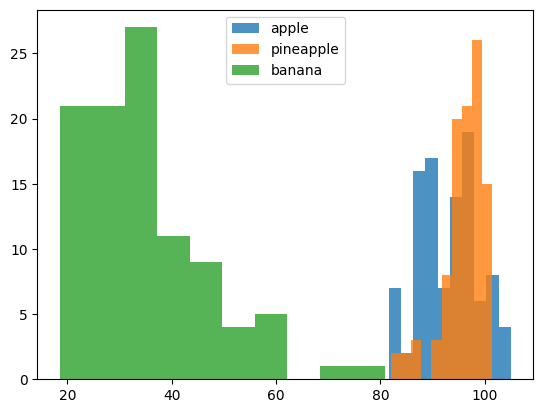

In [44]:
# 평균값들의 히스토그램
plt.hist(np.mean(apple, axis=1),label = 'apple', alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), label = 'pineapple', alpha=0.8)
plt.hist(np.mean(banana, axis=1),label = 'banana', alpha=0.8)
plt.legend()
plt.show()

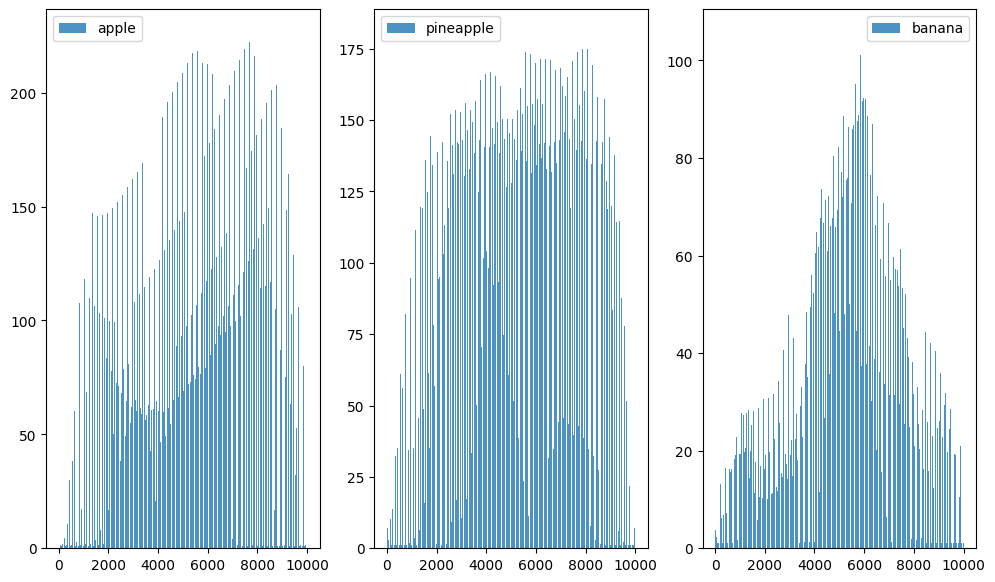

In [48]:
# 픽셀의 평균값의 히스토그램
plt.figure(figsize=(12,7))
plt.subplot(1,3,1)
plt.bar(range(10000),np.mean(apple, axis=0),label = 'apple', alpha=0.8)
plt.legend()

plt.subplot(1,3,2)
plt.bar(range(10000), np.mean(pineapple, axis=0), label = 'pineapple', alpha=0.8)
plt.legend()

plt.subplot(1,3,3)
plt.bar(range(10000),np.mean(banana, axis=0),label = 'banana', alpha=0.8)
plt.legend()
plt.show()

([], [])

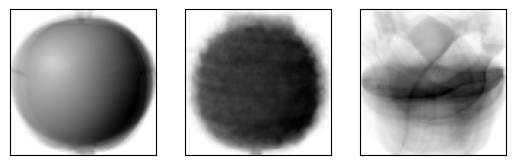

In [50]:
# 평균이미지를 그려보고..실제 이미지와 평균의 이미지가 비슷하면 해당 이미지를 분류
apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)

plt.subplot(1,3,1)
plt.imshow(apple_mean,cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(pineapple_mean,cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(banana_mean,cmap='gray_r')
plt.xticks([])
plt.yticks([])



In [52]:
apple_mean.shape, pineapple_mean.shape, banana_mean.shape

((100, 100), (100, 100), (100, 100))

In [53]:
type(apple_mean)

numpy.ndarray

In [55]:
a= np.array([1,5,8,9,7,4,5,1,4,1,5,4,7,8,5,4,1,3])
b = np.array([3])
np.abs(a-b)

array([2, 2, 5, 6, 4, 1, 2, 2, 1, 2, 2, 1, 4, 5, 2, 1, 2, 0])

In [56]:
np.argsort(np.abs(a-b))

array([17, 15, 11,  5,  8,  6,  7, 16,  9, 10, 14,  1,  0, 12,  4,  2, 13,
        3])

In [65]:
# 사과의 평균과 가장가까운 이미지 100개를 추출
apple_diff = np.abs(data - apple_mean)
data_apple_mean = np.mean(apple_diff,axis=(1,2))
apple_index = np.argsort(data_apple_mean)[:100]
apple_index

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

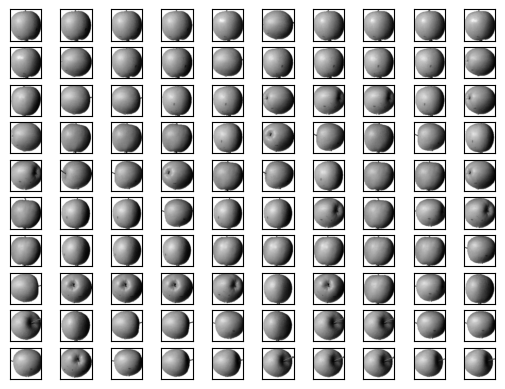

In [68]:
data[apple_index]
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(data[apple_index][i],cmap='gray_r')
  plt.xticks([])
  plt.yticks([])
plt.show()  

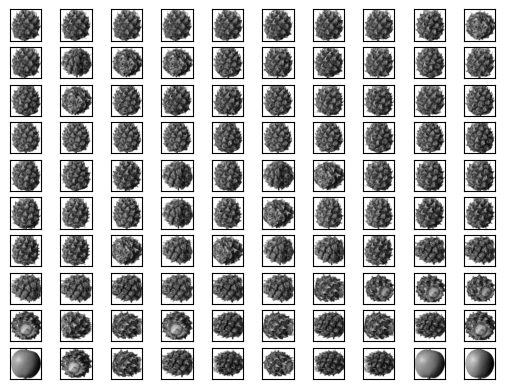

In [71]:
pineapple_diff = np.abs(data - pineapple_mean)
data_pineapple_mean = np.mean(pineapple_diff,axis=(1,2))
pineapple_index = np.argsort(data_pineapple_mean)[:100]
data[pineapple_index]
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(data[pineapple_index][i],cmap='gray_r')
  plt.xticks([])
  plt.yticks([])
plt.show() 